In [323]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [324]:
pd.set_option('display.max_rows', 5)

In [325]:
df = pd.read_csv(r"C:\Users\henry\OneDrive - Louisiana State University\Dota2Predictor\dota.csv")

In [326]:
df.dropna(inplace=True)

# Use Binary Logistic Regression to predict Win Probability

## Win Probability vs. Number of Kills

#### Set x - Kills, y - Win Probability

In [327]:
X - df['Kills']

0      11191.0
1      16398.0
        ...   
288     9398.0
289     7495.0
Length: 290, dtype: float64

In [328]:
y - df['Result'].replace({"Won" : 1, "Lost" : 0}).to_frame()

,Result
0,0.0
1,0.0
...,...
288,0.0
289,0.0


#### Plot Result vs. Kills

Text(0, 0.5, 'Result')

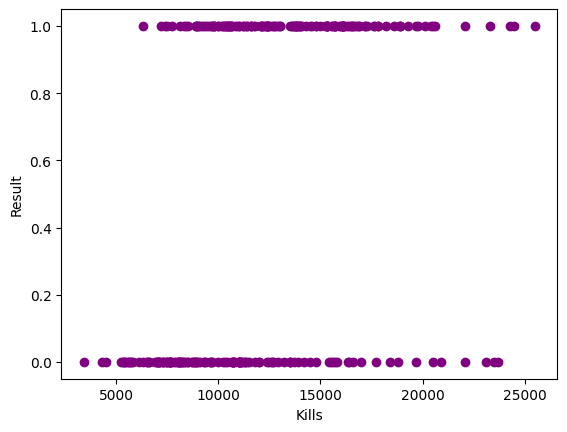

In [329]:
plt.scatter(X, y, color = 'purple', marker = "o")

plt.xlabel('Kills')
plt.ylabel('Result')

#### Divide the data set

In [330]:
X_train, X_test, y_train, y_test = train_test_split(df[['Kills']], y, train_size = 0.9)

ValueError: Found input variables with inconsistent numbers of samples: [290, 289]

In [ ]:
model = LogisticRegression()

#### Train the model

In [ ]:
model.fit(X_train,y_train)

C:\Users\henry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
ypred = model.predict(X_test)

#### Check Accuracy of model

In [ ]:
model.score(X_test,y_test)

0.4482758620689655

#### Predict Win Probability vs. Kills

In [ ]:
X_predict = np.arange(1,25)

In [ ]:
probabilities = model.predict_proba(X_predict.reshape(-1,1))

C:\Users\henry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#### Plot Win Probability vs. Predicted Number of Kills

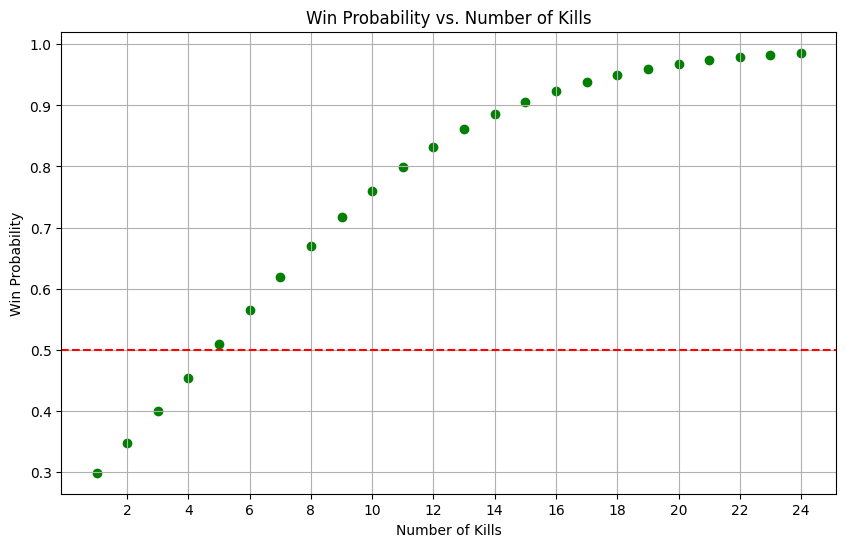

In [331]:
plt.figure(figsize = (10,6))

plt.scatter(X_predict, probabilities[:,1], marker = 'o', color = 'green')


x_ticks = list(range(2,26,2))

plt.xticks(x_ticks)
plt.xlabel('Number of Kills')
plt.ylabel('Win Probability')
plt.title("Win Probability vs. Number of Kills")

plt.axhline(y=0.5, color='red', linestyle = '--')

plt.grid(True)
plt.show()

## Win Probability vs. Number of Deaths

#### Set x - Deaths, y - Win Probability

In [ ]:
X = df['Deaths']

In [ ]:
y = df['Result'].replace({'Won' : 1, 'Lost' : 0}).to_frame()

#### Plot Result vs. Deaths

Text(0, 0.5, 'Result')

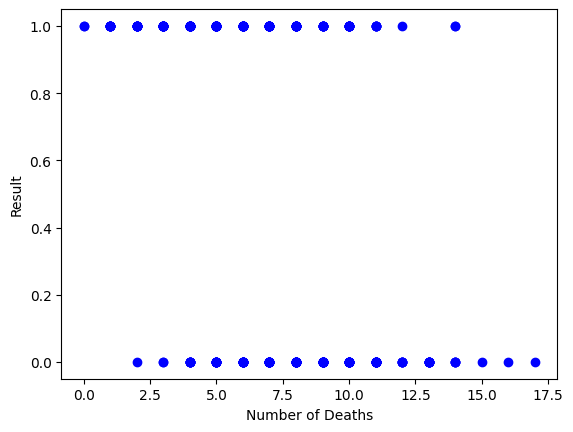

In [ ]:
plt.scatter(df.Deaths, y.Result, marker = 'o', color = 'b')

plt.xlabel('Number of Deaths')
plt.ylabel('Result')

#### Divide Data Set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['Deaths']], y, train_size=0.9)

#### Train the model

In [ ]:
model.fit(X_train, y_train)

C:\Users\henry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
ypred = model.predict(X_test)

### Check Accuracy

In [ ]:
model.score(X_test,y_test)

0.6551724137931034

#### Predict Input of 1-18 Deaths

In [ ]:
X_predict = np.arange(1,18)

In [ ]:
probabilities = model.predict_proba(X_predict.reshape(-1, 1)) # X_predict.reshape(-1, 1) convert 1D to 2D array

C:\Users\henry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#### Plot Predicted Deaths vs. Win Probability

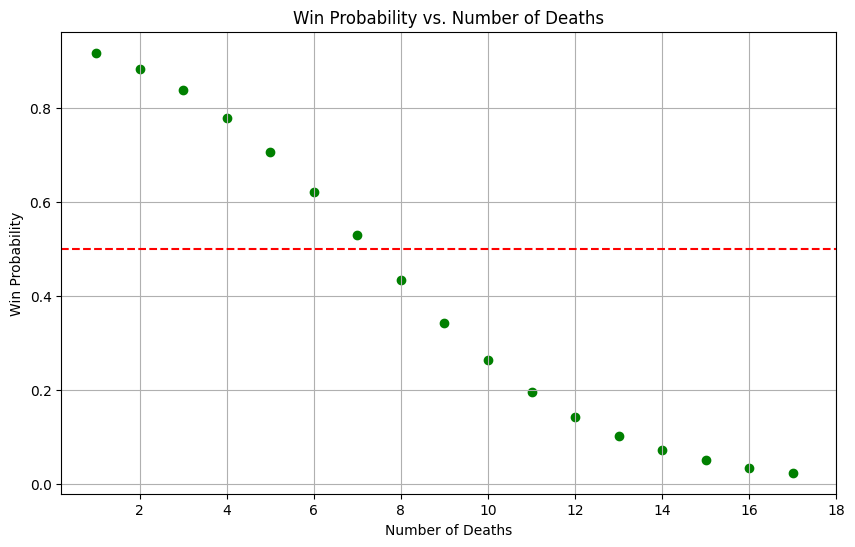

In [ ]:
plt.figure(figsize = (10,6))

plt.scatter(X_predict, probabilities[:,1], marker = 'o', color = 'green')


x_ticks = list(range(2,20,2))

plt.xticks(x_ticks)
plt.xlabel('Number of Deaths')
plt.ylabel('Win Probability')
plt.title("Win Probability vs. Number of Deaths")

plt.axhline(y=0.5, color='red', linestyle = '--')

plt.grid(True)
plt.show()

## Win Probability vs. Assists

#### Set X - Assists, Y - Result

In [ ]:
X = df['Assists']
y = df['Result'].replace({'Won' : 1, 'Lost' : 0}).to_frame()

#### Plot Result vs. Assists 

Text(0.5, 1.0, 'Result vs. Assists')

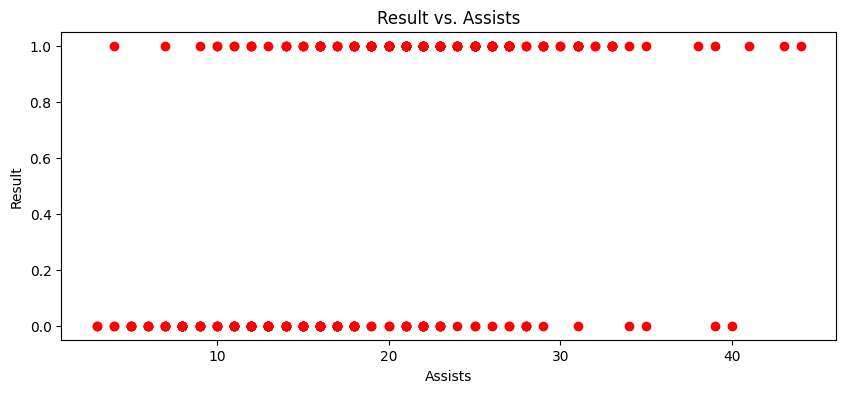

In [ ]:
plt.figure(figsize = (10,4))
plt.scatter(X, y, marker = 'o', color = 'red')

plt.xlabel('Assists')
plt.ylabel('Result')
plt.title('Result vs. Assists')

#### Divide Data Set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['Assists']], y, train_size = 0.9)

#### Train the model

In [ ]:
model.fit(X_train, y_train)

C:\Users\henry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
ypred = model.predict(X_test)

### Check Accuracy of Model


In [ ]:
model.score(X_test,y_test)

0.6896551724137931

#### Predict for Number of Assists (1-30)

In [ ]:
X_predict = np.arange(1,30)

In [ ]:
probabilities = model.predict_proba(X_predict.reshape(-1, 1))

C:\Users\henry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#### Plot Win Probability vs. Predicted Assists

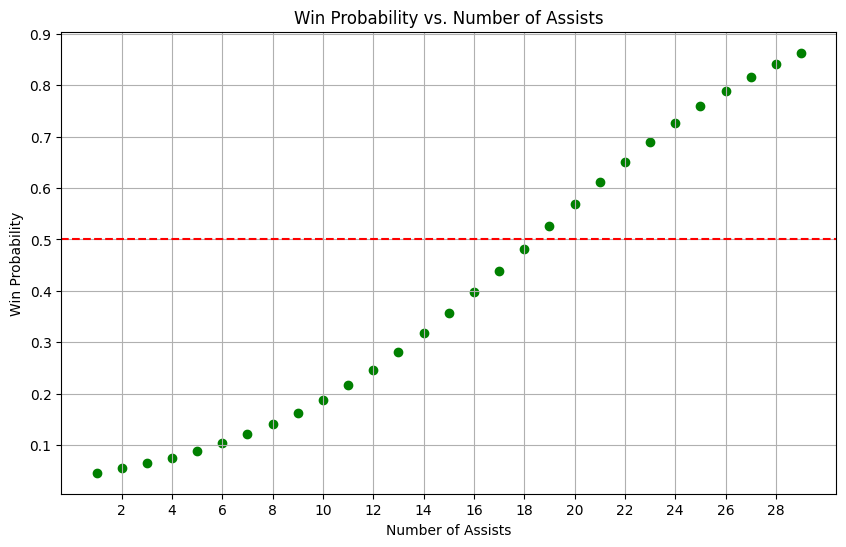

In [ ]:
plt.figure(figsize = (10,6))

plt.scatter(X_predict, probabilities[:,1], marker = 'o', color = 'green')


x_ticks = list(range(2,30,2))

plt.xticks(x_ticks)
plt.xlabel('Number of Assists')
plt.ylabel('Win Probability')
plt.title("Win Probability vs. Number of Assists")

plt.axhline(y=0.5, color='red', linestyle = '--')

plt.grid(True)
plt.show()

## Win Probability vs. Networth


#### Set x - Networth, y - Win Probability

In [ ]:
X = df['Networth']

#### Plot Networth vs. Win Probability

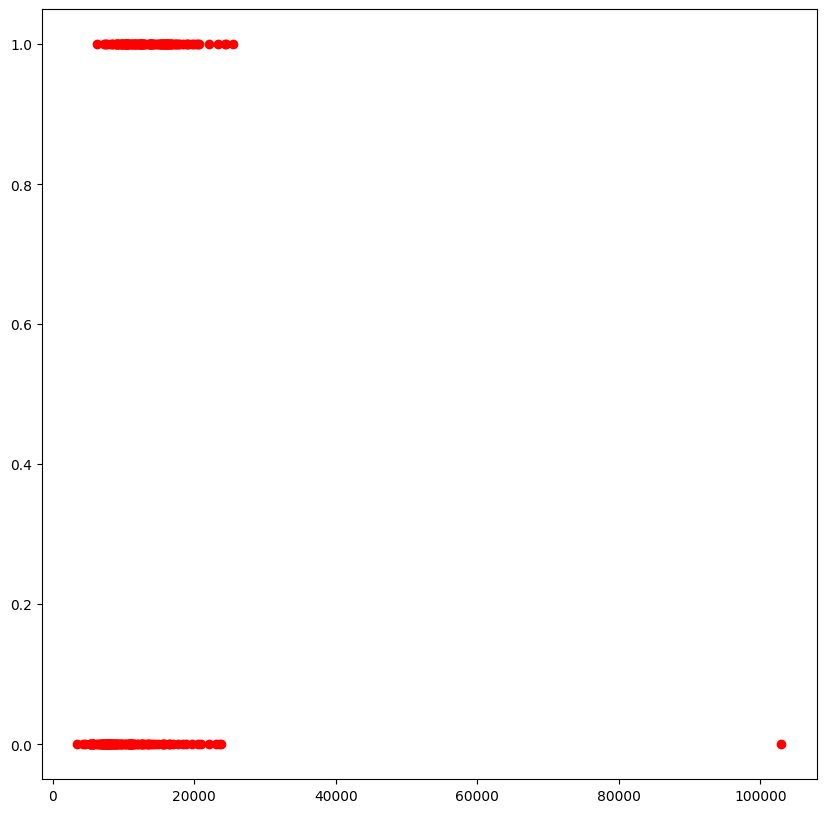

In [ ]:
plt.figure(figsize = (10,10))

plt.scatter(X, y, marker = 'o', color = 'red')

### Remove Outlier - Was a match I disconnected

In [ ]:
sorted_networth = sorted(df['Networth'].values, reverse= True)
sorted_networth[:5]

[103000.0, 25500.0, 24500.0, 24300.0, 23700.0]

In [ ]:
df[df['Networth'] >= 100000]

,MatchID,Date,Hero,Match Duration,Result,Kills,Deaths,Assists,Networth,Team,Enemy_pos1,Enemy_pos2,Enemy_pos3,Enemy_pos4,Enemy_pos5,Ally_pos1,Ally_pos2,Ally_pos3,Ally_pos4
193,7.056366e+09,3/11/2023 22:34,lion,40:48:00,Lost,2.0,13.0,5.0,103000.0,Radiant,ursa,witch_doctor,legion_commander,nyx_assassin,hoodwink,juggernaut,storm_spirit,mars,ancient_apparition


In [ ]:
df.drop(193, inplace=True)

#### Plot Result vs. Networth

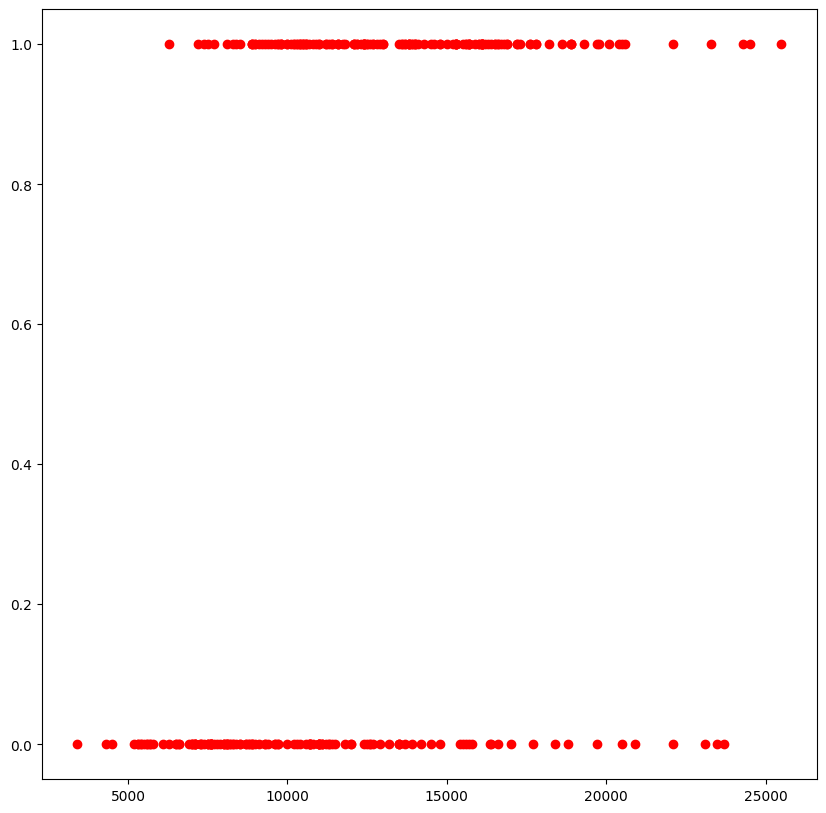

In [ ]:
X = df['Networth']
y = df['Result'].replace({'Won' : 1, 'Lost' : 0}).to_frame()

plt.figure(figsize = (10,10))

plt.scatter(X, y, marker = 'o', color = 'red')

#### Divide the Data Set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['Networth']], y, train_size=0.9)

#### Train the model

In [ ]:
model.fit(X_train, y_train)

C:\Users\henry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
ypred = model.predict(X_test)

#### Check Accuracy of Model

In [ ]:
model.score(X_test,y_test)

0.6206896551724138

#### Predict networth in range of 1-25000

In [ ]:
X_predict = np.arange(1,25000, 1000)

In [ ]:
probabilities = model.predict_proba(X_predict.reshape(-1, 1))

C:\Users\henry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#### Plot Win Probability vs. Predicted Networth

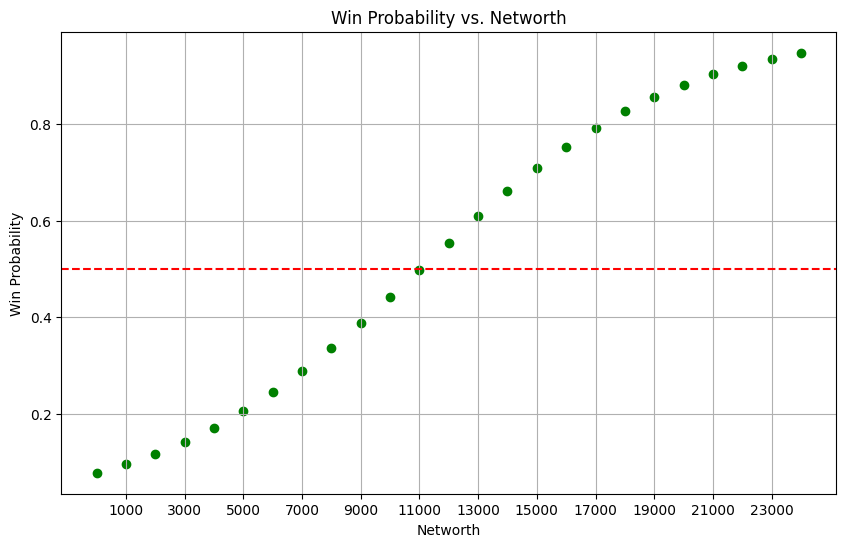

In [ ]:
plt.figure(figsize = (10,6))

plt.scatter(X_predict, probabilities[:,1], marker = 'o', color = 'green')

x_ticks = list(range(1000,25000,2000))

plt.xticks(x_ticks)
plt.xlabel('Networth')
plt.ylabel('Win Probability')
plt.title("Win Probability vs. Networth")

plt.axhline(y=.5, color = 'red' , linestyle = '--')
plt.grid(True)
plt.show()